# Importing the libraries and Loading the Dataset

In [ ]:
#Data Analysis
import pandas as pd
import numpy as np

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import class_weight

# Evaluating Algorithms
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn import metrics

# Read the CSV file
data = pd.read_csv("Hypertension-risk-model-main.csv")



In [ ]:
# loading the csv data to a Pandas DataFrame
data = pd.read_csv("/kaggle/input/hypertension-risk-model-main/Hypertension-risk-model-main.csv")

# Handling missing values

In [ ]:
# checking for missing values
missing_data=data.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/data.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")



Missing data:
male               0
age                0
currentSmoker      0
cigsPerDay        29
BPMeds            53
diabetes           0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          388
Risk               0
dtype: int64
The total percentage of missing data is 12.74%


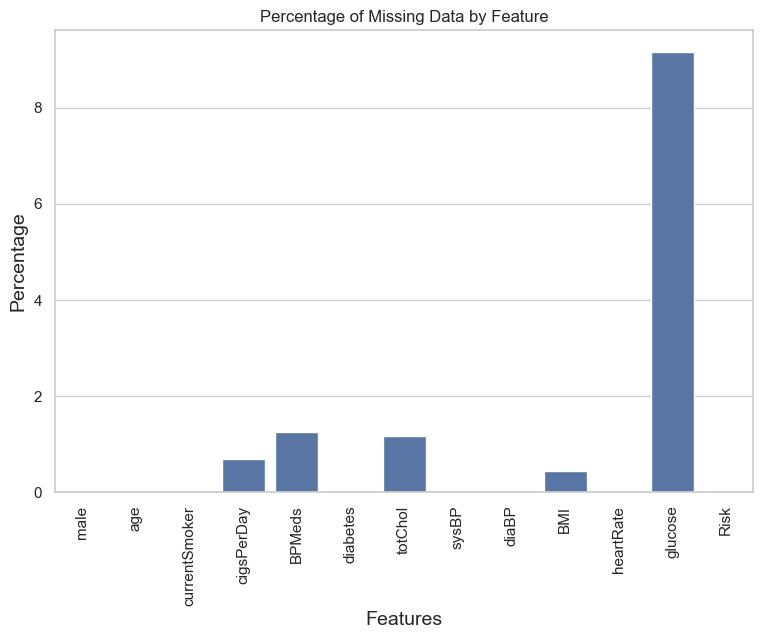

In [ ]:
# Calculate the percentage of missing data for each feature
missing_data = missing_data.to_frame(name='Total')  # Convert Series to DataFrame
missing_data['Percentage'] = (missing_data['Total'] / len(data)) * 100

# Create a bar plot to visualize the percentage of missing data by feature
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)
plt.title("Percentage of Missing Data by Feature")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# Drop missing values
data.dropna(axis=0,inplace=True)

In [ ]:
# checking for missing values
missing_data=data.isnull().sum()
print("\nMissing data:")
print(missing_data)
total_percentage=(missing_data.sum()/data.shape[0])*100
print(f"The total percentage of missing data is {round(total_percentage,2)}%")


Missing data:
male             0
age              0
currentSmoker    0
cigsPerDay       0
BPMeds           0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
Risk             0
dtype: int64
The total percentage of missing data is 0.0%


In [ ]:
data.shape

(3751, 13)

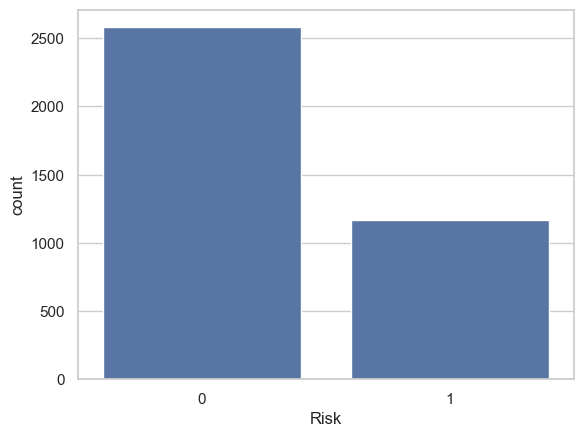

There are 2581 patients without risk of Hypertension and 1170 patients with risk of Hypertension


In [ ]:
sns.countplot(x="Risk",data=data)
plt.show()
cases=data.Risk.value_counts()
print(f"There are {cases[0]} patients without risk of Hypertension and {cases[1]} patients with risk of Hypertension")

In [ ]:
data["age"].unique

<bound method Series.unique of 0       39
1       46
2       48
3       61
4       46
        ..
4233    50
4234    51
4237    52
4238    40
4239    39
Name: age, Length: 3751, dtype: int64>

In [ ]:
data["age"].min()

np.int64(32)

In [ ]:
data["age"].max()

np.int64(70)

# Data Processing

In [ ]:
# Seperating Categorical colums and numerical colums
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
      cont_val.append(column)

# Encoding categorical data

In [ ]:
cate_val

['male', 'currentSmoker', 'BPMeds', 'diabetes', 'Risk']

In [ ]:
cont_val

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

C:\Users\Rohan\AppData\Local\Temp\ipykernel_6856\722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);
C:\Users\Rohan\AppData\Local\Temp\ipykernel_6856\722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);


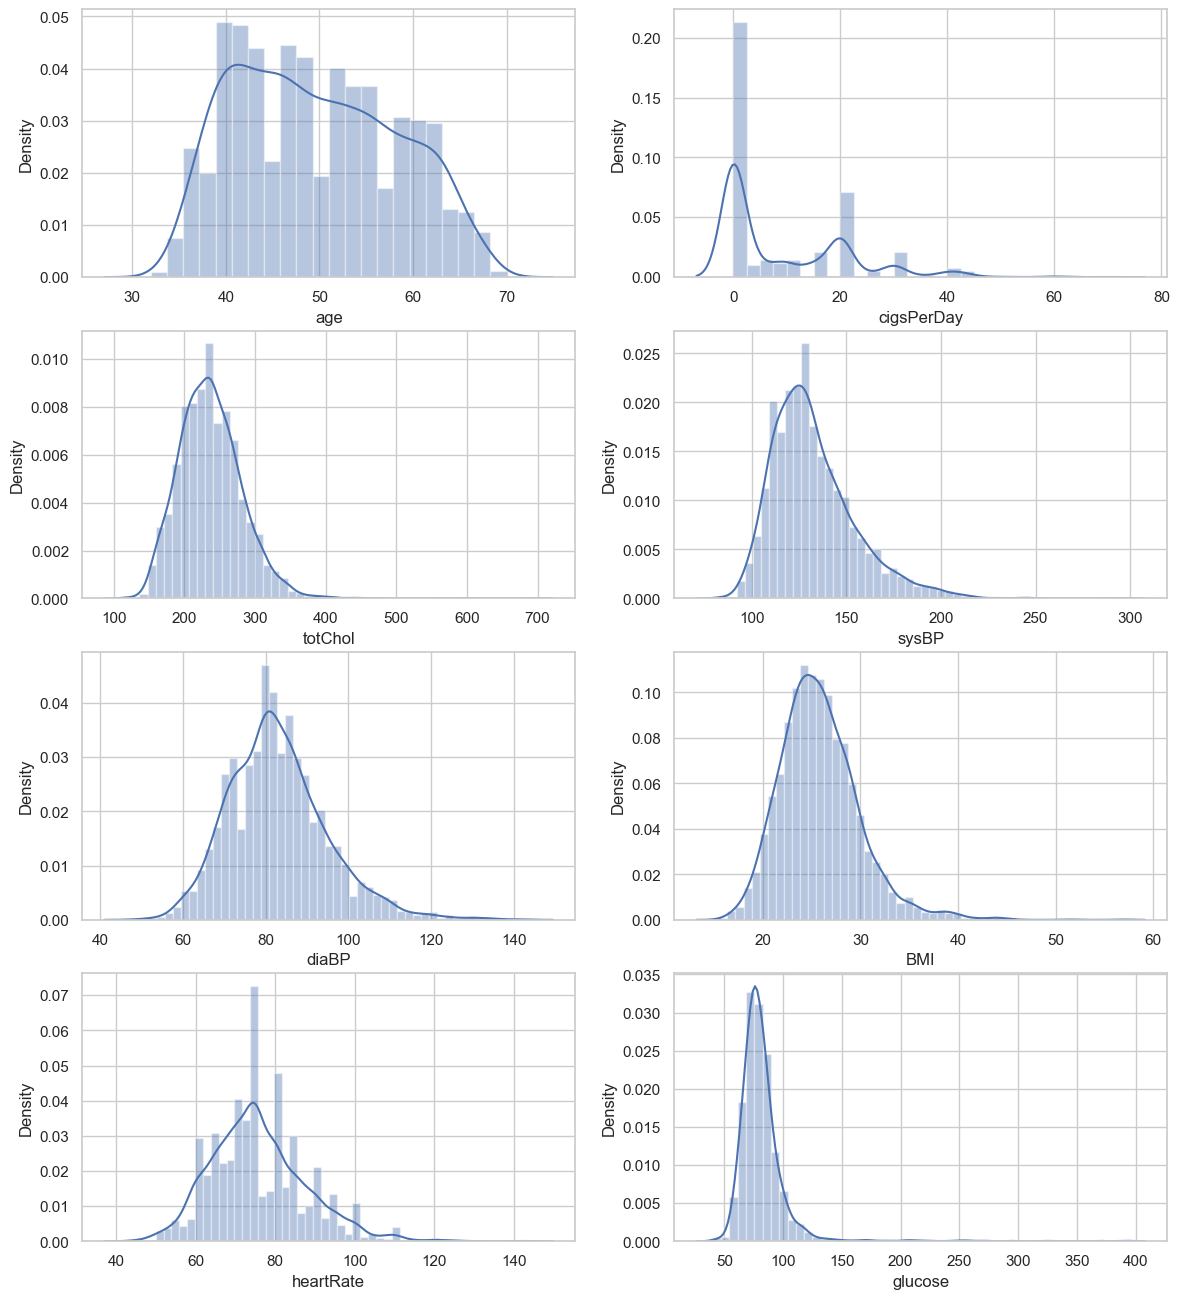

/tmp/ipykernel_77/722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);
/tmp/ipykernel_77/722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);


/tmp/ipykernel_77/722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);
/tmp/ipykernel_77/722049287.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col], ax=axes[index1][index2]);


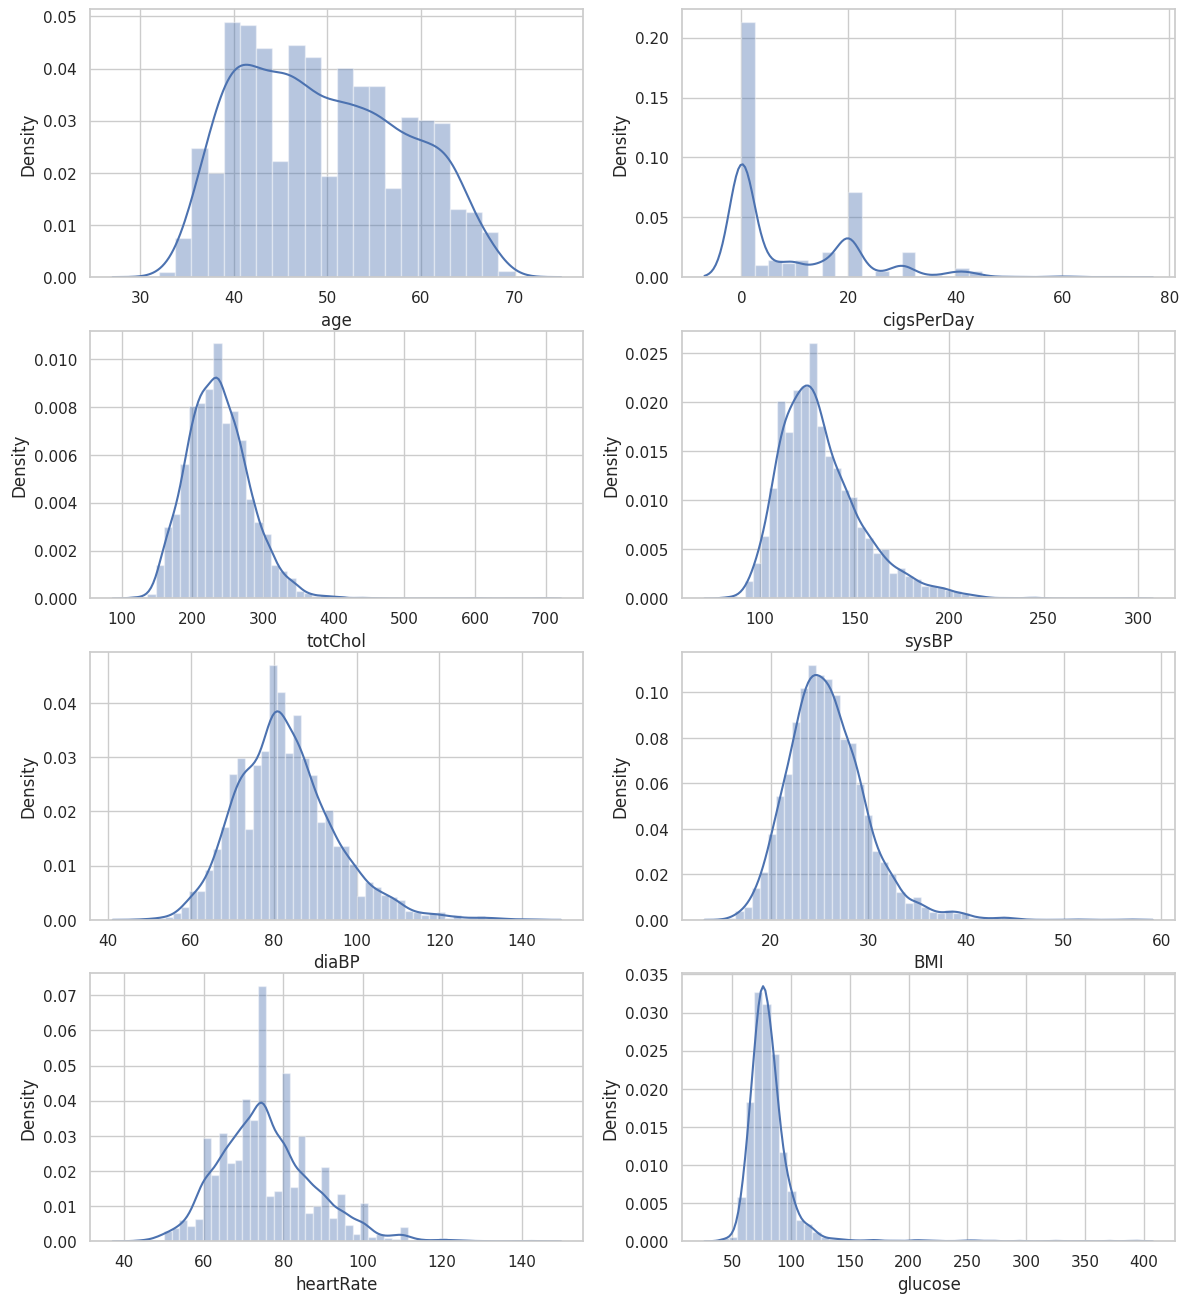

In [ ]:
f, axes = plt.subplots(4, 2, figsize=(14,16))

index1 = 0
index2 = 0

for col in cont_val:
    sns.distplot(data[col], ax=axes[index1][index2]);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show();

C:\Users\Rohan\AppData\Local\Temp\ipykernel_6856\1280439329.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['Risk'] == 0]['age'], label='No risk of Hypertension')
C:\Users\Rohan\AppData\Local\Temp\ipykernel_6856\1280439329.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[da

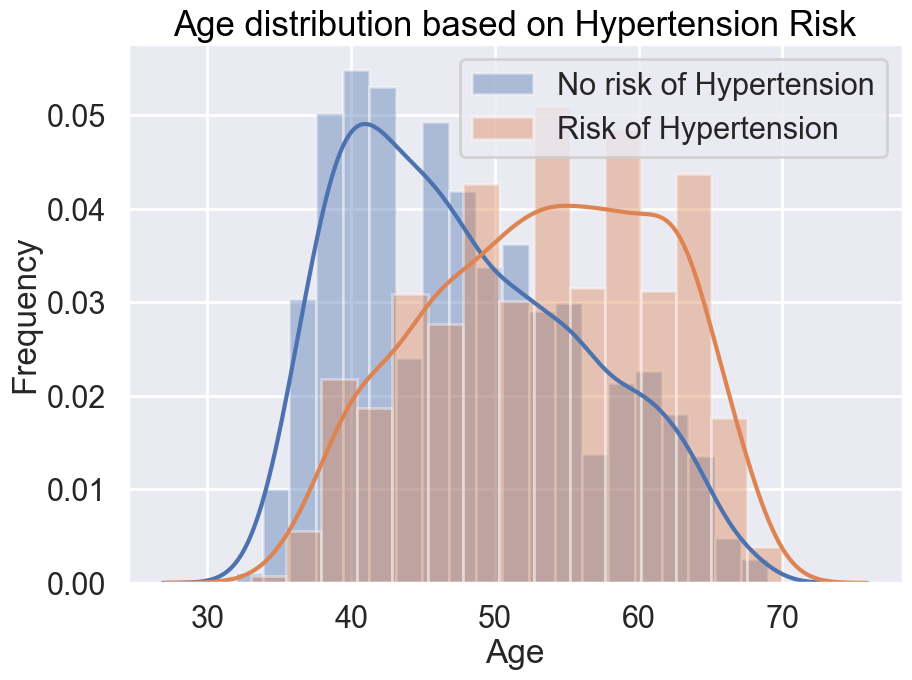

In [ ]:
sns.set_theme(context='poster')
plt.figure(figsize=(10,7))
plt.title('Age distribution based on Hypertension Risk', color="Black",fontsize=25)

sns.distplot(data[data['Risk'] == 0]['age'], label='No risk of Hypertension')
sns.distplot(data[data['Risk'] == 1]['age'], label = 'Risk of Hypertension')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

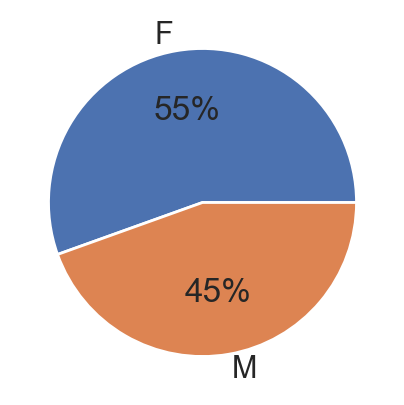

In [ ]:
# list for the sex column
gender = ['F','M']

# make an object which store value count of the elements in sex column
gender_data = pd.Series(data['male']).value_counts()

# adjust size of the pie chart
plt.figure(figsize=(5,5))

# ploting pie chart
plt.pie(gender_data,labels=gender,autopct='%.0f%%')

plt.show()

# Statistics on the variables

In [ ]:
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,0.488403,9.008531,0.030392,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.311917
std,0.497056,8.570204,0.499932,11.925097,0.171686,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.463338
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,1.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Checking the target variable

In [ ]:
data["Risk"].value_counts(normalize=True)


Risk
0    0.688083
1    0.311917
Name: proportion, dtype: float64

# Feature Selection using Chi Square (Category)

In [ ]:
cate_val=data[['male','currentSmoker','BPMeds','diabetes']]

In [ ]:
cate_val

,male,currentSmoker,BPMeds,diabetes
0,1,0,0.0,0
1,0,0,0.0,0
2,1,1,0.0,0
3,0,1,0.0,0
4,0,1,0.0,0
...,...,...,...,...
4233,1,1,0.0,0
4234,1,1,0.0,0
4237,0,0,0.0,0
4238,1,0,0.0,0


In [ ]:
from sklearn.feature_selection import chi2
X = cate_val
y = data['Risk']

In [ ]:
chi_scores = chi2(X,y)

In [ ]:
chi_scores

(array([2.67929705e-02, 2.12611918e+01, 2.51482051e+02, 2.45535880e+01]),
 array([8.69978667e-01, 4.00763549e-06, 1.23407877e-56, 7.22716419e-07]))

<Axes: >

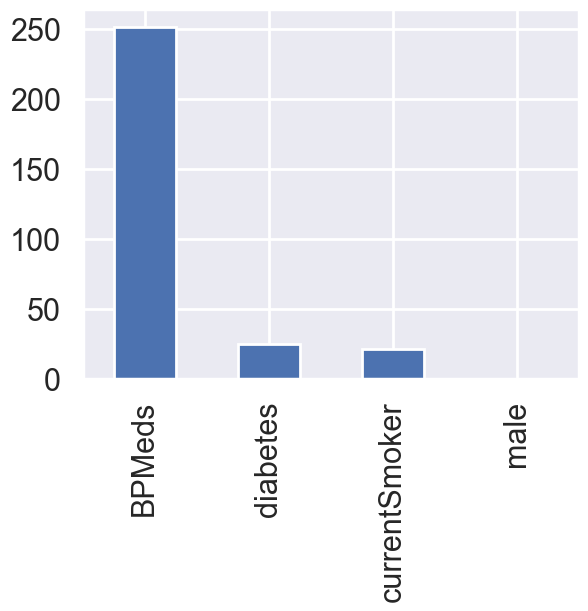

In [ ]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()


<Axes: >

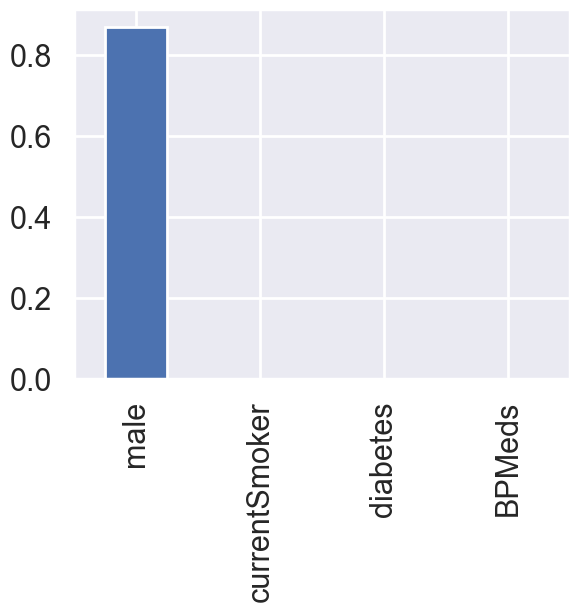

In [ ]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

# Feature Scaling

In [ ]:
#putting the features into the same scale
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#st = StandardScaler()
#data[cont_val] = st.fit_transform(data[cont_val])

In [ ]:
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Risk
0,1,39,0,0.0,0.0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# Load your dataset
df = pd.read_csv("Hypertension-risk-model-main.csv")

# Assuming your target variable is named 'target'
target_variable = 'Risk'

# Count the occurrences of each class
class_counts = df[target_variable].value_counts()

# Identify the minority and majority class
minority_class = class_counts.idxmin()
majority_class = class_counts.idxmax()

# Print or use the information as needed
print(f"Minority class: {minority_class}")
print(f"Majority class: {majority_class}")

Minority class: 1
Majority class: 0


In [ ]:
!pip install -U imbalanced-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/257.7 kB ? eta -:--:--

     ━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/257.7 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 143.4/257.7 kB 1.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 1.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [ ]:
data.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'diabetes',
       'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'Risk'],
      dtype='object')

# Splitting the Dataset into Training Set and Test Set

In [ ]:
X = data.drop('Risk',axis=1)

In [ ]:
y = data['Risk']

In [ ]:
X_train,X_test,y_train,y_test=train_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
y_test

2435    0
1168    1
3761    1
496     0
3983    1
       ..
2723    0
3540    1
685     1
3036    0
2289    1
Name: Risk, Length: 751, dtype: int64

# SVM

In [ ]:
from sklearn.svm import SVC
svm = svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(X_test)

In [ ]:
#Checking the Accuracy
accuracy_score(y_test,y_pred2)

0.8801597869507324

AUC: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       516
           1       0.85      0.75      0.80       235

    accuracy                           0.88       751
   macro avg       0.87      0.85      0.86       751
weighted avg       0.88      0.88      0.88       751



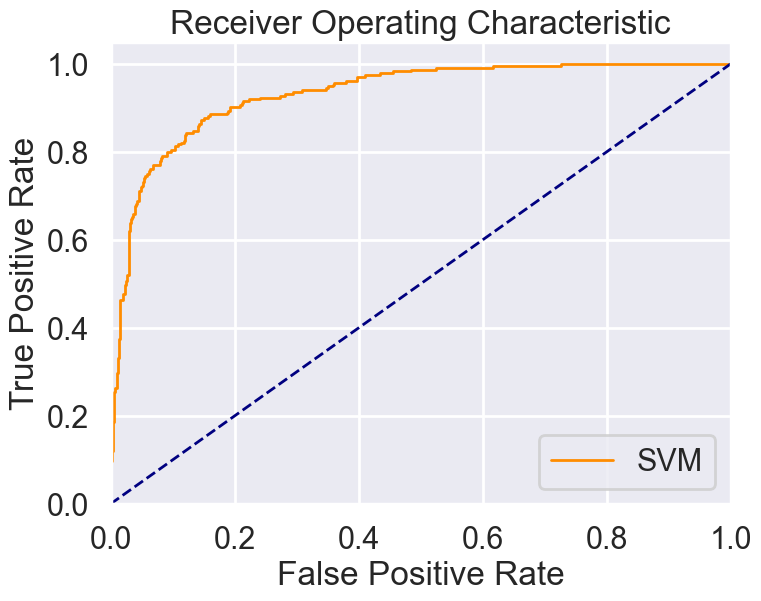

True Positive (TP): 177
True Negative (TN): 484
False Positive (FP): 32
False Negative (FN): 58
Confusion matrix:
[[484  32]
 [ 58 177]]
Detection Accuracy: 88.02%
Detection Error: 11.98%


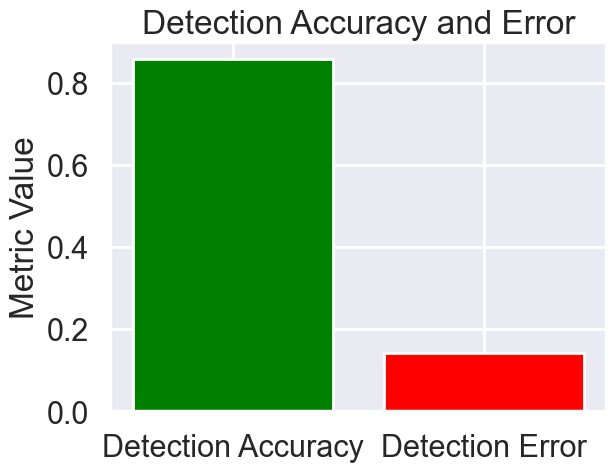

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, f1_score, recall_score, classification_report


# Make predictions on the test data
y_pred2 = svm.predict(X_test)

# Calculate the AUC score
y_prob = svm.decision_function(X_test)  # Get decision function scores for AUC
roc_auc = roc_auc_score(y_test, y_prob)

# Calculate precision, F1-score, and recall
print(f'AUC: {roc_auc:.2f}')
precision = precision_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)

# Display classification report with precision, recall, F1-score, and support
class_report = classification_report(y_test, y_pred2)
print("Classification Report:\n", class_report)

# Generate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='SVM')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Calculate confusion matrix
conf_matrix = confusion_matrix (y_test, y_pred2)
# Extract TP, TN, FP, FN from the confusion matrix
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Print or use these values as needed
print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")

#Calculate detection accuracy
detection_accuracy = accuracy_score(y_test, y_pred2)

#Calculate detection error
detection_error = 1 - detection_accuracy

#Display results
print(f"Confusion matrix:\n{conf_matrix}")
print(f"Detection Accuracy: {detection_accuracy:.2%}")
print(f"Detection Error: {detection_error:.2%}")

#Setting a threshold for binary classification
threshold = 0.5
y_pred2 = (y_prob > threshold).astype(int)

#Calculate detection accuracy and error
accuracy = metrics.accuracy_score(y_test, y_pred2)
error = 1 - accuracy

#Bar plot
labels = ['Detection Accuracy', 'Detection Error']
values = [accuracy, error]

plt.bar(labels, values, color = ['green', 'red'])
plt.ylabel('Metric Value')
plt.title('Detection Accuracy and Error')
plt.show()



